# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**


To predict the salary of employee based on the information provided in the dataset.

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### `Dataset Desciption`

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv("train_dataset.csv", nrows=100000)
train_data_salaries = pd.read_csv("train_salaries.csv", nrows=100000)
test_data = pd.read_csv("test_dataset.csv")

In [4]:
train_data.shape

(100000, 8)

In [5]:
# print head of train data
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [6]:
# print head of train data salaries
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [7]:
# print test head
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [8]:
# Adding salary data to train_dataset
train_data = train_data.merge(train_data_salaries, on="jobId", how="left")
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [10]:
# get all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [11]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                100000 non-null  object
 1   companyId            100000 non-null  object
 2   jobType              100000 non-null  object
 3   degree               100000 non-null  object
 4   major                100000 non-null  object
 5   industry             100000 non-null  object
 6   yearsExperience      100000 non-null  int64 
 7   milesFromMetropolis  100000 non-null  int64 
 8   salary               100000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 7.6+ MB


In [12]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [13]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_data.describe()

yearsExperience  milesFromMetropolis         salary
count     100000.00000        100000.000000  100000.000000
mean          11.94206            49.373400     115.821400
std            7.20478            28.876814      38.710017
min            0.00000             0.000000       0.000000
25%            6.00000            24.000000      88.000000
50%           12.00000            49.000000     114.000000
75%           18.00000            74.000000     141.000000
max           24.00000            99.000000     292.000000

In [14]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [15]:
# len of train and test dataset
print("Shape of train_data = {}".format(train_data.shape))
print("Shape of test_data = {}".format(test_data.shape))

Shape of train_data = (100000, 9)
Shape of test_data = (1000000, 8)


## Get unique values

In [16]:
# get how many unique values are in train_dataset
for i in train_data.columns:
    print(i)
    print(train_data[i].unique())
    print("\n")

jobId
['JOB1362684407687' 'JOB1362684407688' 'JOB1362684407689' ...
 'JOB1362684507684' 'JOB1362684507685' 'JOB1362684507686']


companyId
['COMP37' 'COMP19' 'COMP52' 'COMP38' 'COMP7' 'COMP15' 'COMP24' 'COMP20'
 'COMP41' 'COMP56' 'COMP4' 'COMP54' 'COMP57' 'COMP14' 'COMP61' 'COMP58'
 'COMP3' 'COMP44' 'COMP30' 'COMP27' 'COMP34' 'COMP11' 'COMP31' 'COMP49'
 'COMP0' 'COMP1' 'COMP36' 'COMP47' 'COMP8' 'COMP42' 'COMP50' 'COMP53'
 'COMP48' 'COMP45' 'COMP46' 'COMP2' 'COMP5' 'COMP55' 'COMP29' 'COMP40'
 'COMP33' 'COMP22' 'COMP12' 'COMP25' 'COMP6' 'COMP23' 'COMP17' 'COMP28'
 'COMP21' 'COMP26' 'COMP43' 'COMP51' 'COMP10' 'COMP59' 'COMP13' 'COMP39'
 'COMP16' 'COMP9' 'COMP32' 'COMP62' 'COMP35' 'COMP18' 'COMP60']


jobType
['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']


degree
['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']


major
['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']


industry
['HEALTH' 'WEB' 'AUTO' 'FINAN

In [17]:
# get how many unique values are in test_dataset
for i in test_data.columns:
    print(i)
    print(test_data[i].unique())
    print("\n")

jobId
['JOB1362685407687' 'JOB1362685407688' 'JOB1362685407689' ...
 'JOB1362686407684' 'JOB1362686407685' 'JOB1362686407686']


companyId
['COMP33' 'COMP13' 'COMP10' 'COMP21' 'COMP36' 'COMP40' 'COMP32' 'COMP11'
 'COMP39' 'COMP22' 'COMP27' 'COMP48' 'COMP54' 'COMP23' 'COMP28' 'COMP26'
 'COMP20' 'COMP60' 'COMP6' 'COMP31' 'COMP34' 'COMP12' 'COMP19' 'COMP15'
 'COMP41' 'COMP51' 'COMP25' 'COMP59' 'COMP53' 'COMP45' 'COMP5' 'COMP56'
 'COMP29' 'COMP1' 'COMP52' 'COMP18' 'COMP55' 'COMP2' 'COMP24' 'COMP49'
 'COMP61' 'COMP16' 'COMP17' 'COMP38' 'COMP3' 'COMP35' 'COMP42' 'COMP4'
 'COMP7' 'COMP14' 'COMP50' 'COMP37' 'COMP9' 'COMP57' 'COMP58' 'COMP43'
 'COMP46' 'COMP0' 'COMP62' 'COMP44' 'COMP47' 'COMP30' 'COMP8']


jobType
['MANAGER' 'JUNIOR' 'CTO' 'SENIOR' 'CEO' 'VICE_PRESIDENT' 'JANITOR' 'CFO']


degree
['HIGH_SCHOOL' 'NONE' 'MASTERS' 'DOCTORAL' 'BACHELORS']


major
['NONE' 'BIOLOGY' 'COMPSCI' 'PHYSICS' 'LITERATURE' 'MATH' 'CHEMISTRY'
 'ENGINEERING' 'BUSINESS']


industry
['HEALTH' 'AUTO' 'OIL' 'FINAN

## Counting the total number of missing values¶

In [18]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [19]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [20]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(columns = ["jobId", "companyId"])
train_data.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary  
0                   83     130  
1                   73     101  
2                   38     137  
3                   17     142  
4                   16     163

In [21]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(columns = ["jobId", "companyId"])
test_data.head()

jobType       degree    major industry  yearsExperience  \
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1   JUNIOR         NONE     NONE     AUTO               20   
2      CTO      MASTERS  BIOLOGY   HEALTH               17   
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10   

   milesFromMetropolis  
0                   73  
1                   47  
2                    9  
3                   96  
4                   44

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [22]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = train_data.drop(columns = ["yearsExperience","milesFromMetropolis", "salary"])
# looping on whole dataset for geting list of categorical data column name

In [23]:
categorical_list.head(2)

jobType       degree major industry
0     CFO      MASTERS  MATH   HEALTH
1     CEO  HIGH_SCHOOL  NONE      WEB

In [24]:
var_list = train_data.drop(columns=["jobType", "degree", "major", "industry"])

In [25]:
var_list.head(2)

yearsExperience  milesFromMetropolis  salary
0               10                   83     130
1                3                   73     101

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [31]:
# Correlation metrix using pandas
corr = train_data.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

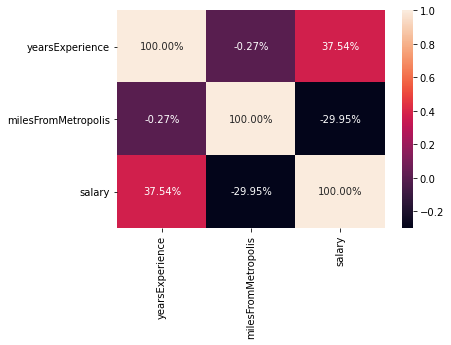

In [30]:
# Correlation metrix using seaborn
sns.heatmap(corr, annot=True, fmt=".2%")
plt.show()

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [36]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table.values)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f = (no_of_row - 1) * (no_of_columns - 1)
    print("Degree of Freedom: ", degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([()])
    chi_square_statistic = 
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value =
    print('critical_value:',critical_value)
    
    #p-value
    p_value =

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

'\n# import necessary libraries for chi-square test\nfrom scipy.stats import chi2_contingency\nfrom scipy.stats import chi2\n\ndef perform_chi_square_test(var_1,var_2):\n    \n    #Contingency Table\n    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])\n    \n    #Observed Values\n    observed_values = contingency_table.values\n    \n    #Expected Values\n    b = chi2_contingency(contingency_table.values)\n    expected_values = b[3]\n    \n    #Degree of Freedom\n    no_of_rows = len(contingency_table)\n    no_of_columns = \n    degree_f=\n    print("Degree of Freedom: ",degree_f)\n    \n    #Significance Level 5%\n    alpha = \n    print(\'Significance level: \',alpha)\n    \n    #chi-square statistic\n    chi_square = \n    chi_square_statistic = \n    print("chi-square statistic: ",chi_square_statistic)\n    \n    #critical_value\n    critical_value =\n    print(\'critical_value:\',critical_value)\n    \n    #p-value\n    p_value =\n\n    print(\'p-value:\',p_va

In [37]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print("chi squre test on: ",x,' ',i,'\n')
            perform_chi_squre_test(x,i)
            print("......................................................\n")

chi squre test on:  jobType   degree 



NameError: name 'perform_chi_squre_test' is not defined

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


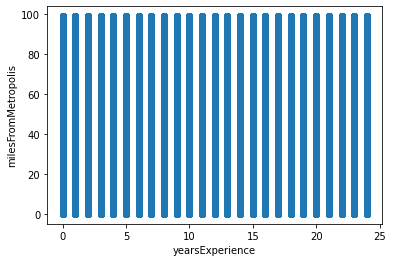

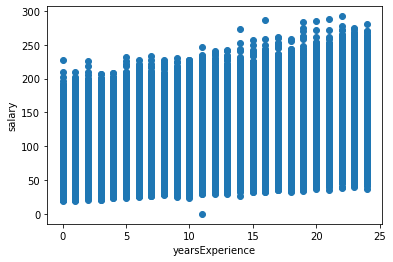

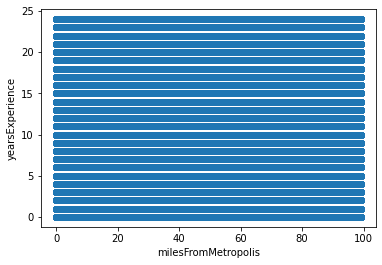

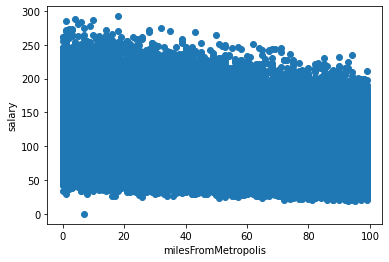

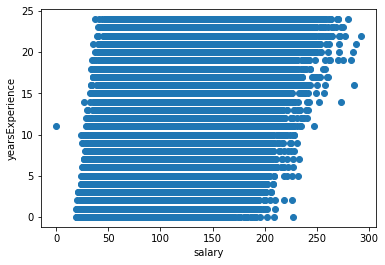

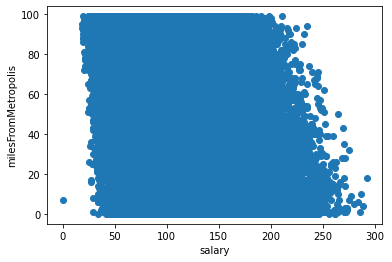

In [41]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x], train_data[y])
    plt.show()
    
    
#loop through the different columns
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i,j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


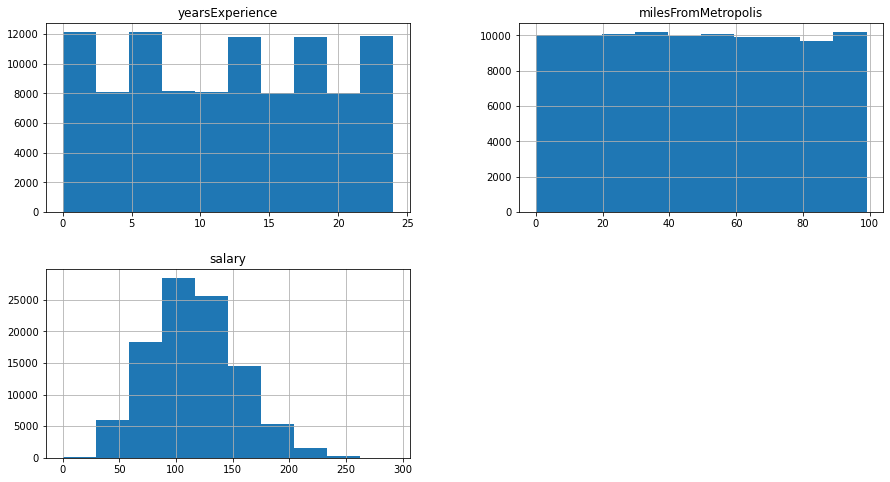

In [43]:
# Histogram using pandas 
train_data.hist(figsize=(15,8))
plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

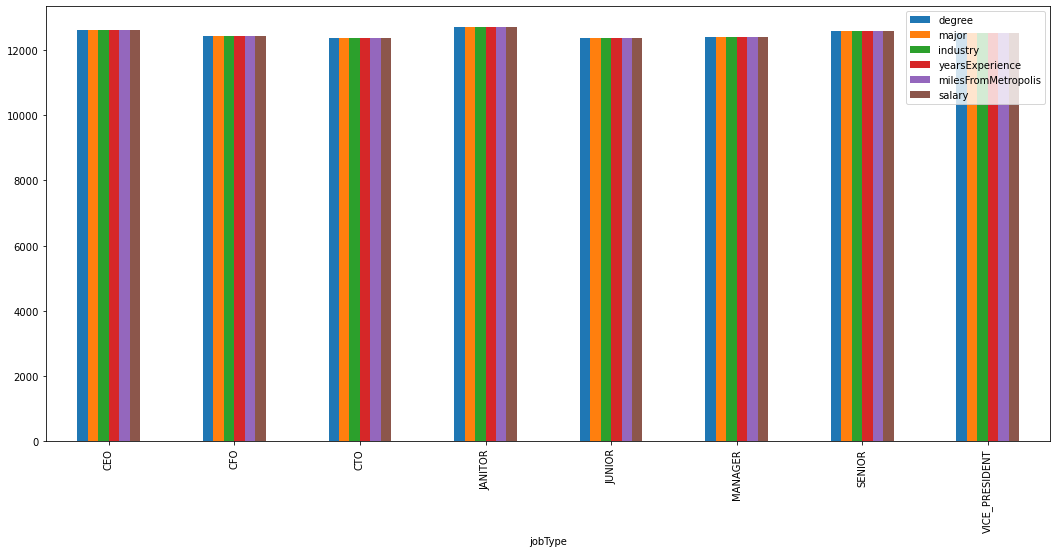

In [45]:
# goup data by jobType and plot count plot
train_data.groupby('jobType').count().plot(kind="bar", figsize=(18,8))
plt.show()

from above graph:
1. All data for each jobType is distributed equally.

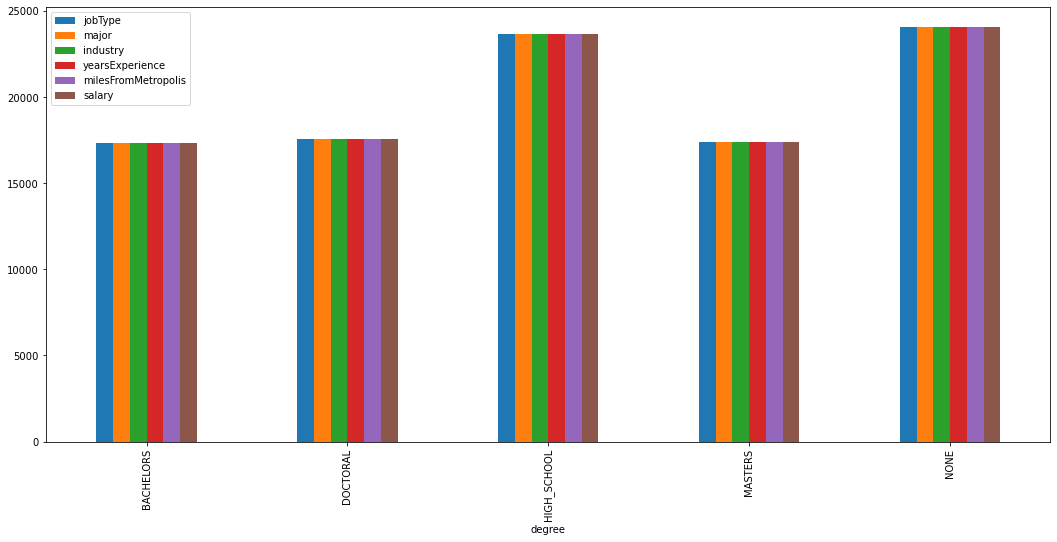

In [46]:
# goup data by degree and plot count plot
train_data.groupby('degree').count().plot(kind="bar", figsize=(18,8))
plt.show()

From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

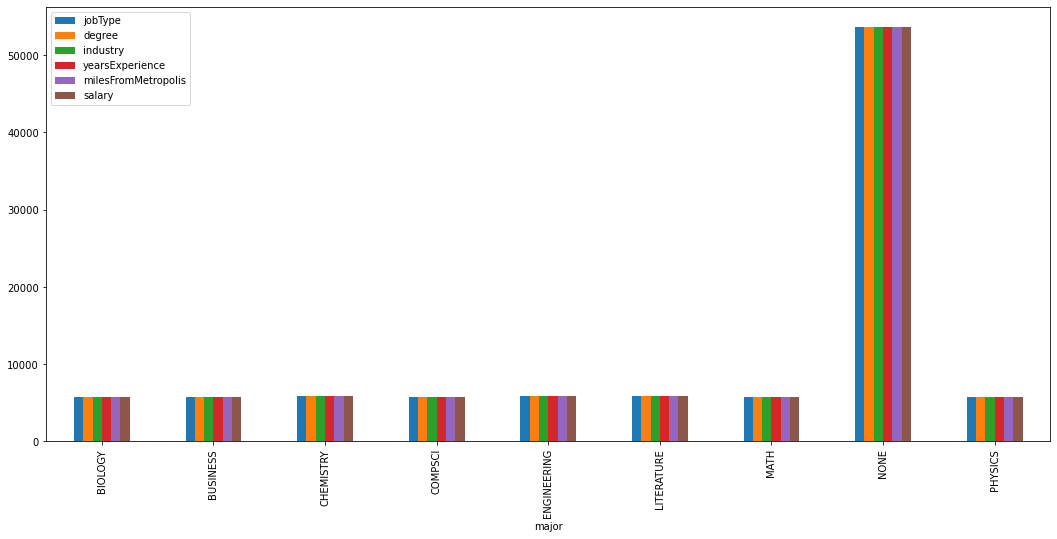

In [47]:
# goup data by major and plot count plot
train_data.groupby('major').count().plot(kind="bar", figsize=(18,8))
plt.show()

From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


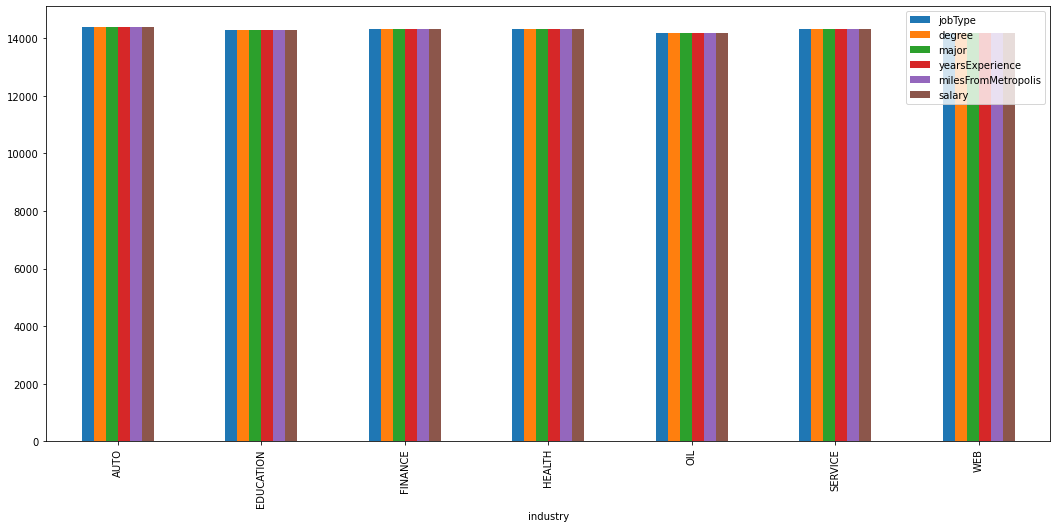

In [48]:
# goup data by industry and plot count plot
train_data.groupby('industry').count().plot(kind="bar", figsize=(18,8))
plt.show()

from above graph:
1. All data for each industry is distributed equally.

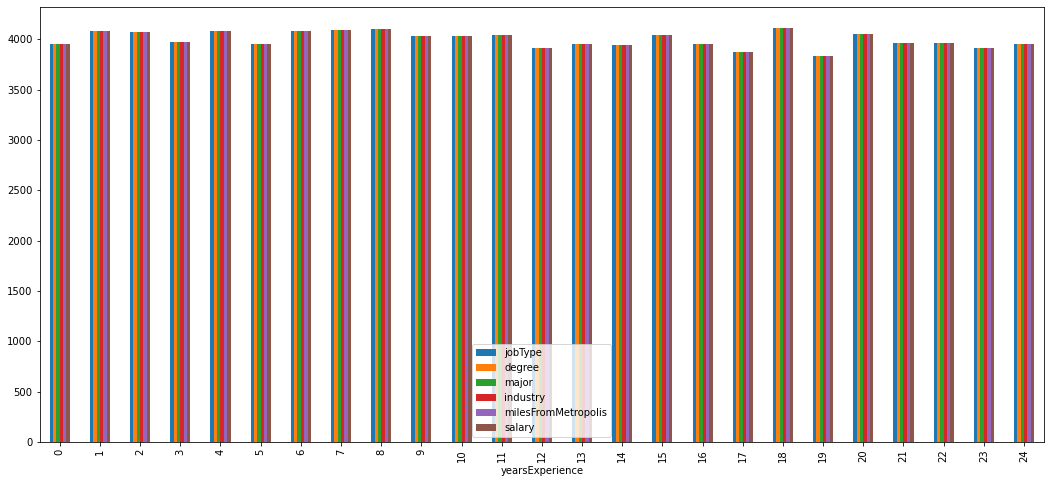

In [49]:
# goup data by yearsExperience and plot count plot
train_data.groupby('yearsExperience').count().plot(kind="bar", figsize=(18,8))
plt.show()

from above graph:
1. All data for each yearsExperience is distributed almost equally.

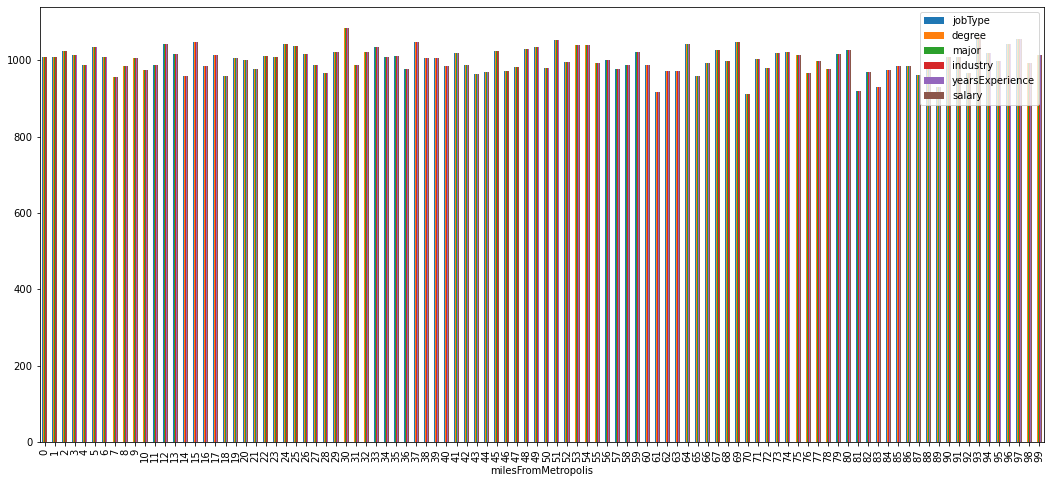

In [50]:
# goup data by milesFromMetropolis and plot count plot
train_data.groupby('milesFromMetropolis').count().plot(kind="bar", figsize=(18,8))
plt.show()

from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

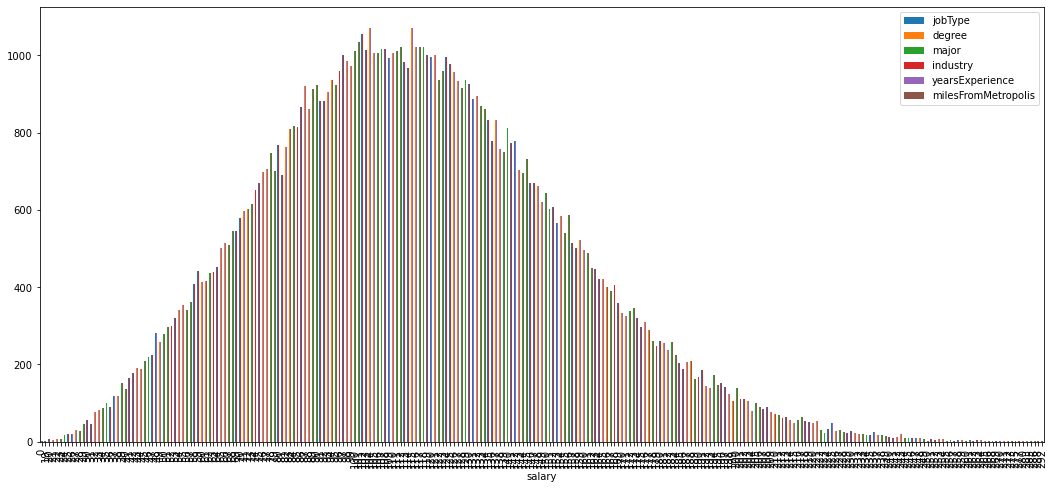

In [51]:
# goup data by salary and plot count plot
train_data.groupby('salary').count().plot(kind="bar", figsize=(18,8))
plt.show()

from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


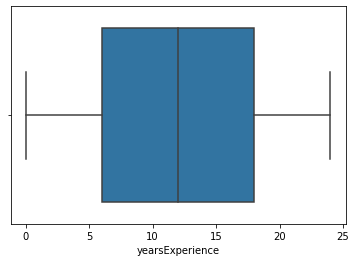

In [52]:
# box plot using pandas 
# box plot for yearsExperience column
sns.boxplot(train_data["yearsExperience"])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

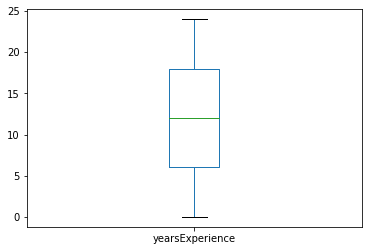

In [53]:
# box plot using pandas 
# box plot for milesFromMetropolies column
train_data["yearsExperience"].plot(kind="box")
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

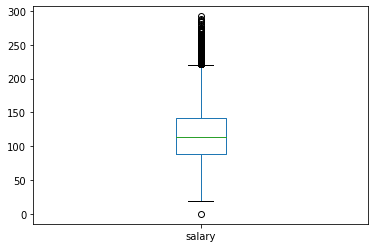

In [54]:
# box plot using pandas 
# box plot for salary column
train_data["salary"].plot(kind="box")
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

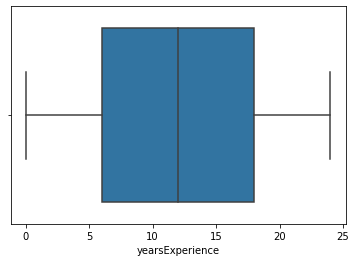

In [55]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column
sns.boxplot(train_data["yearsExperience"])
plt.show()

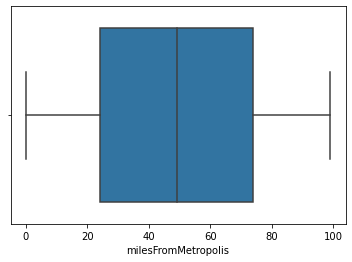

In [56]:
#boxplot for mileFromMetropolis
sns.boxplot(train_data["milesFromMetropolis"])
plt.show()

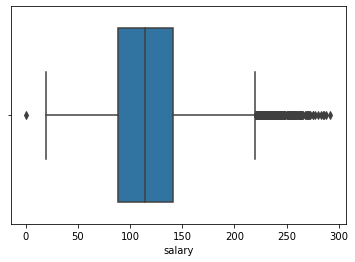

In [57]:
#boxplot for salary column
sns.boxplot(train_data["salary"])
plt.show()


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

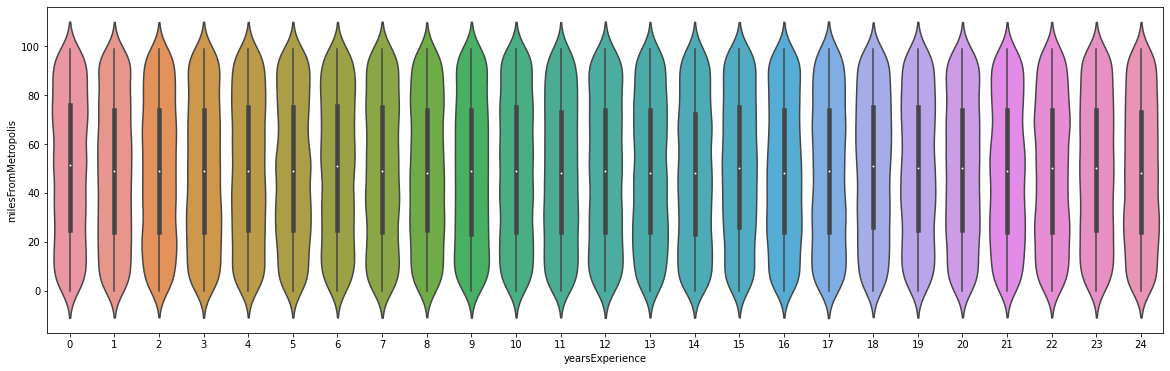

In [58]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x="yearsExperience", y="milesFromMetropolis", data=train_data)
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

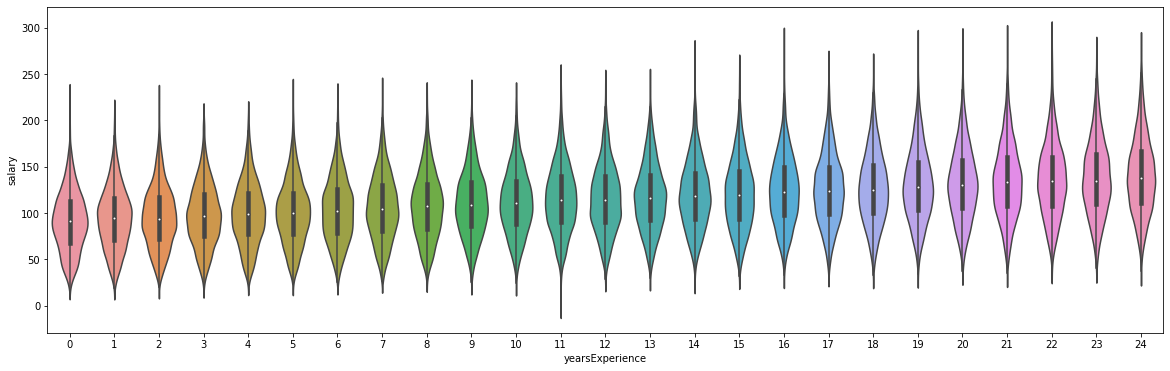

In [59]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x="yearsExperience", y="salary", data=train_data)
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

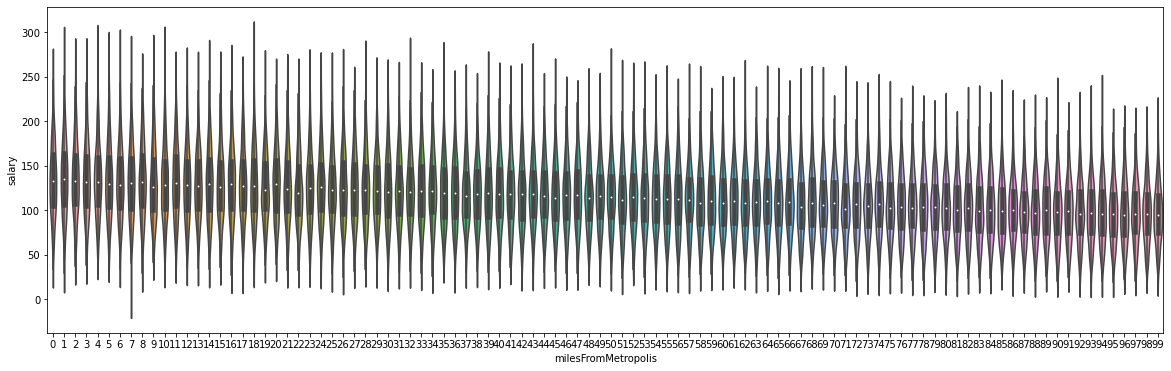

In [60]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x="milesFromMetropolis", y="salary", data=train_data)
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


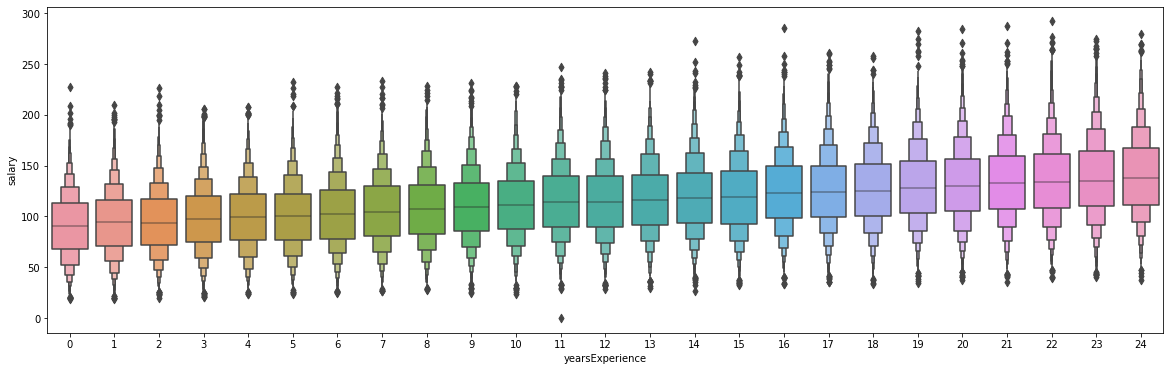

In [61]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x="yearsExperience", y="salary", data=train_data)
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

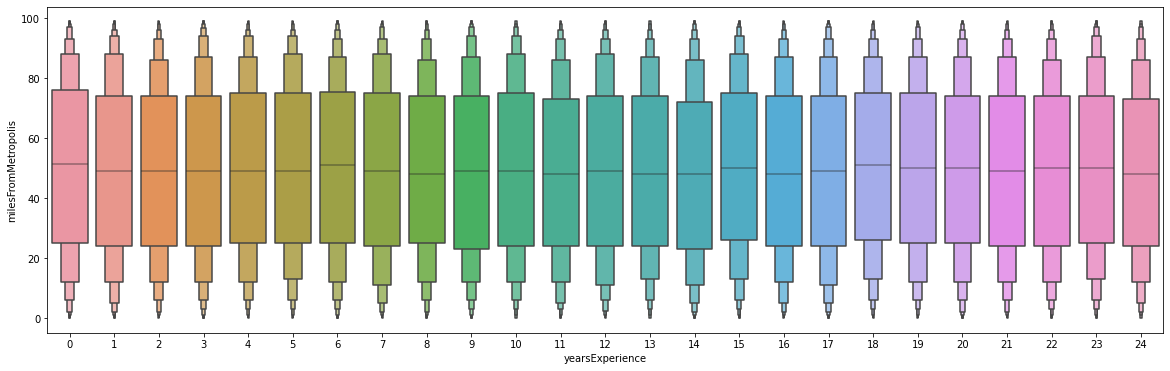

In [62]:
# boxen plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize = (20,6))
sns.boxenplot(x="yearsExperience", y="milesFromMetropolis", data=train_data)
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

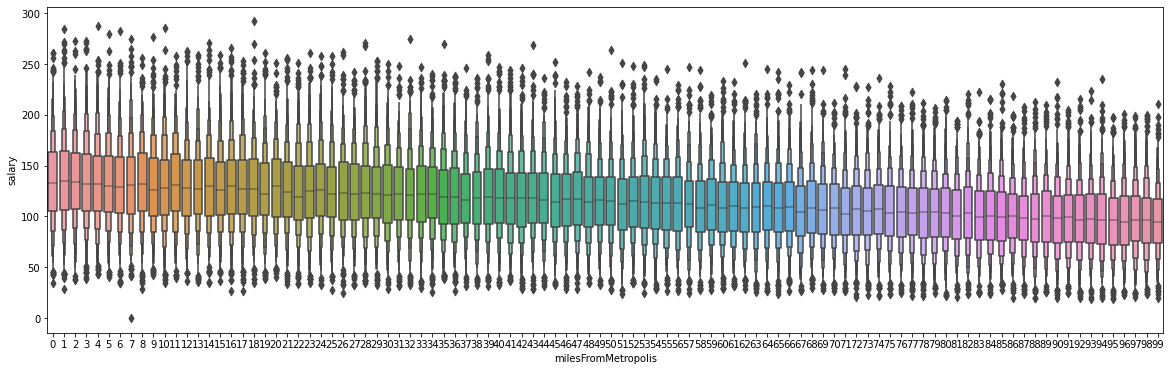

In [63]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize = (20,6))
sns.boxenplot(x="milesFromMetropolis", y="salary", data=train_data)
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

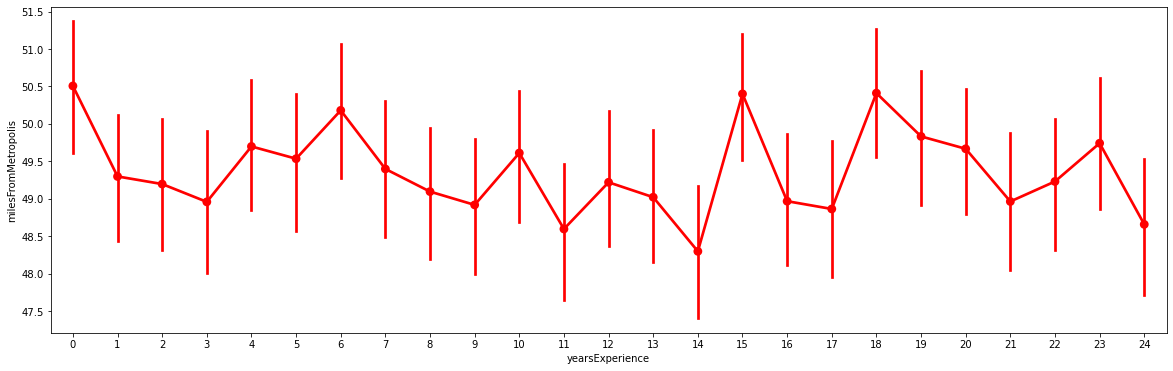

In [64]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.pointplot(x="yearsExperience", y="milesFromMetropolis", data=train_data, color="r")
plt.show()

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

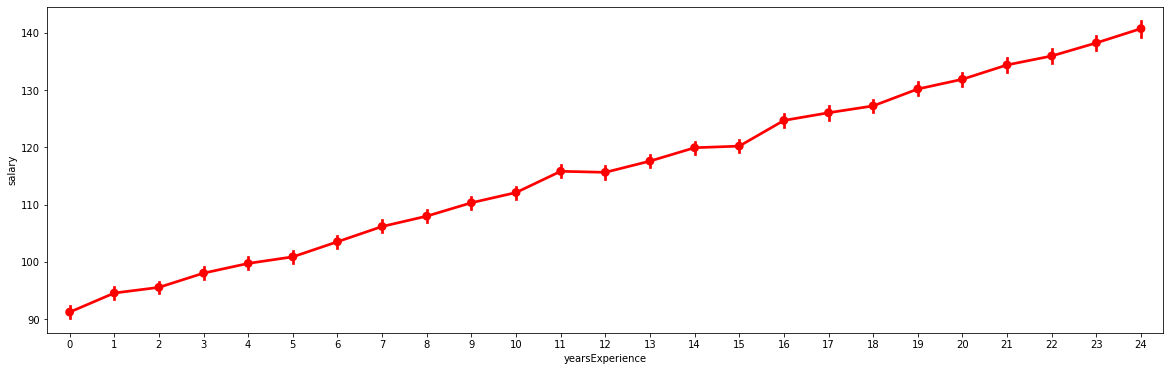

In [65]:
# point plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.pointplot(x="yearsExperience", y="salary", data=train_data, color="r")
plt.show()

From above point plot

There is a increase in salary when there is a increase in yearsExperience

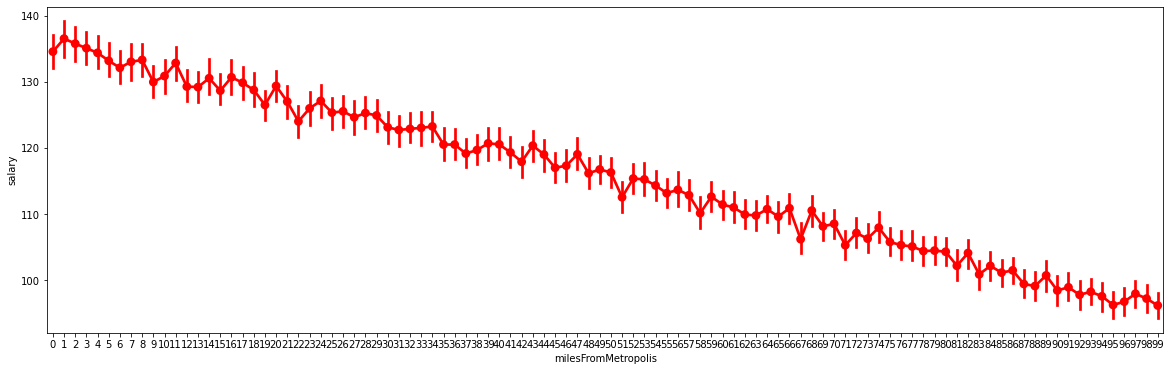

In [66]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.pointplot(x="milesFromMetropolis", y="salary", data=train_data, color="r")
plt.show()

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


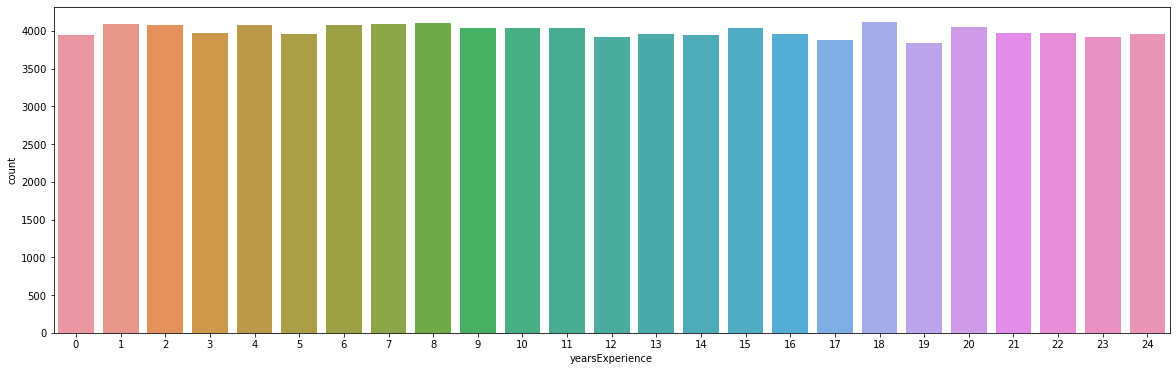

In [67]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x="yearsExperience", data=train_data)
plt.show()

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

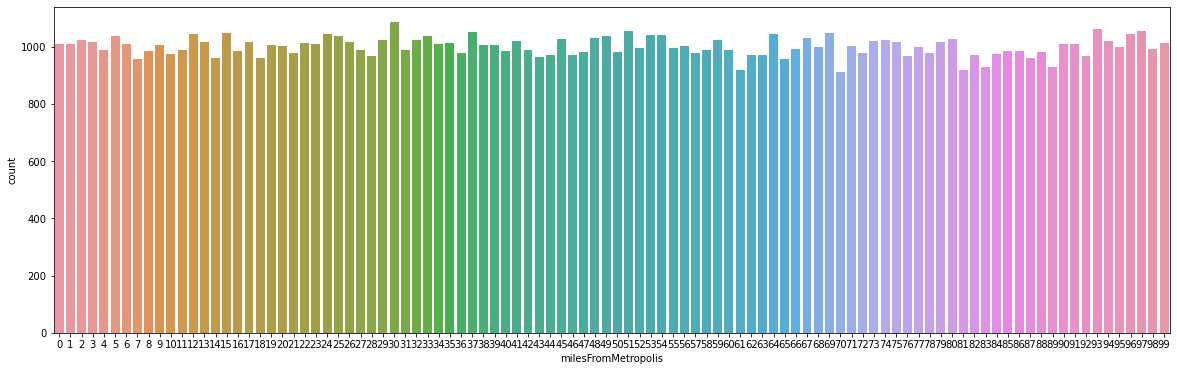

In [68]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x="milesFromMetropolis", data=train_data)
plt.show()

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

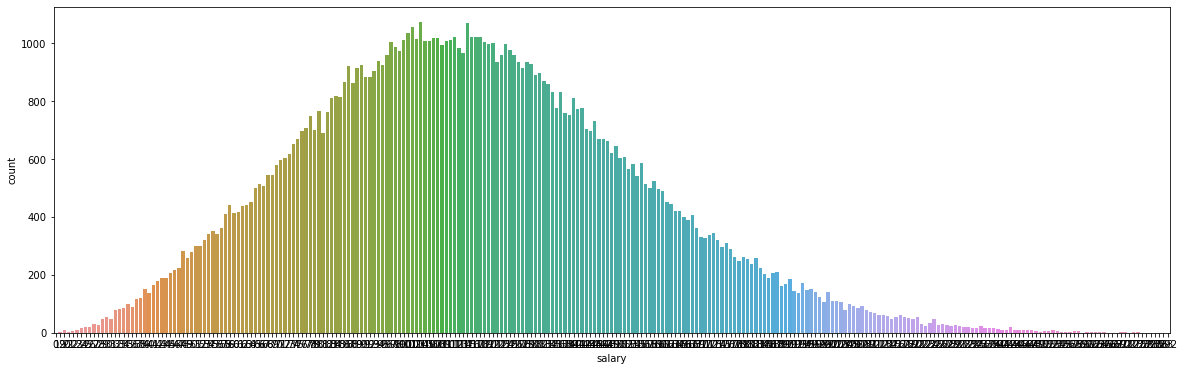

In [69]:
# count plot of whole datset based on salary
plt.figure(figsize=(20,6))
sns.countplot(x="salary", data=train_data)
plt.show()

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

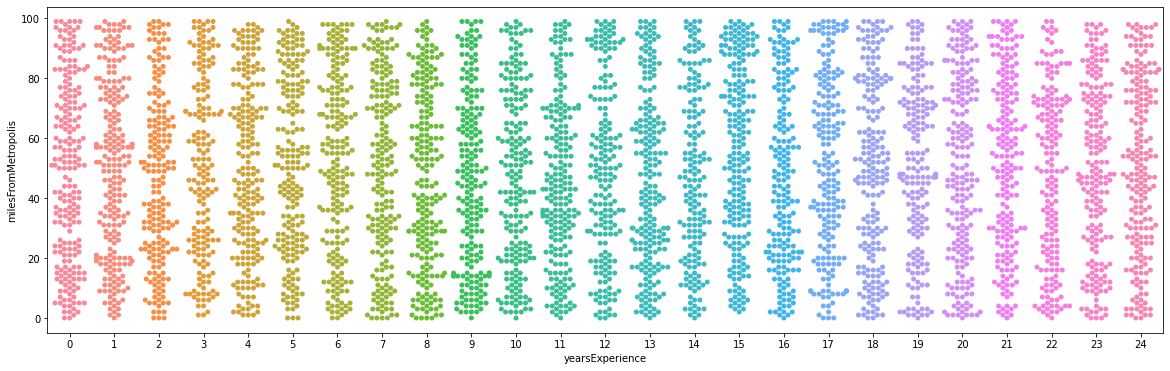

In [70]:
# swarm plot for yearsExperience and milesFromMetropolis columnsplt.figure(figsize=(20,6)), data=train_data.iloc[1:50000]
plt.figure(figsize = (20,6))
sns.swarmplot(x="yearsExperience", y="milesFromMetropolis", data=train_data.iloc[1:5000])
plt.show()

From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

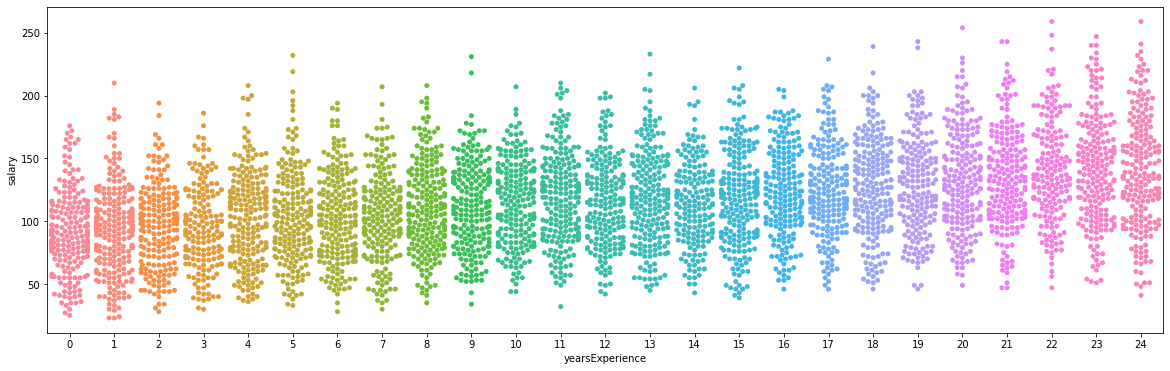

In [71]:
# swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize = (20,6))
sns.swarmplot(x="yearsExperience", y="salary", data=train_data.iloc[1:5000])
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

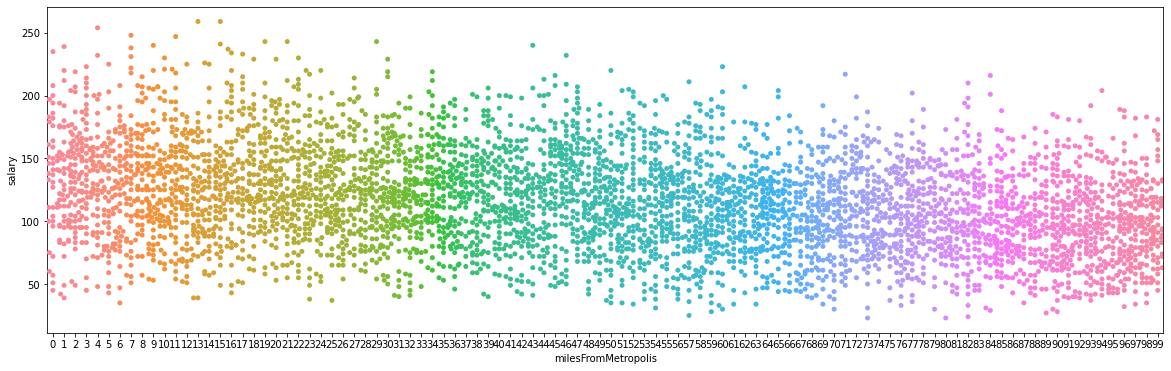

In [72]:
# swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize = (20,6))
sns.swarmplot(x="milesFromMetropolis", y="salary", data=train_data.iloc[1:5000])
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

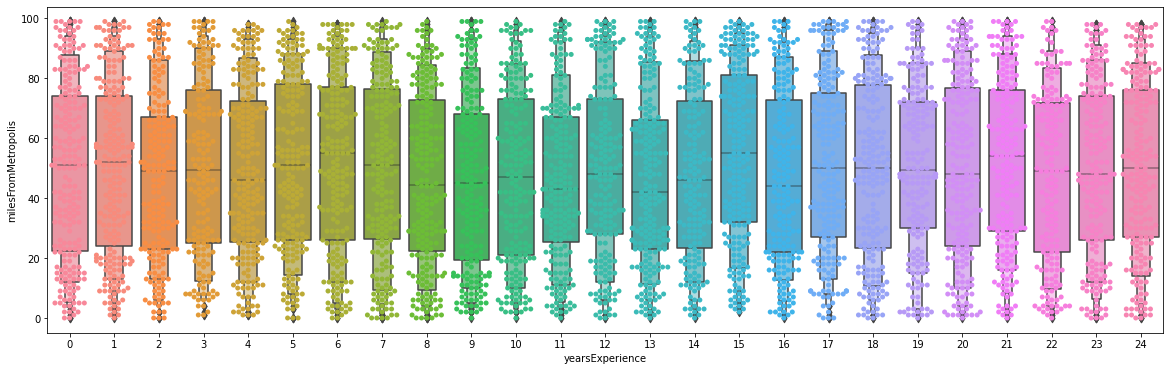

In [73]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns, data=train_data.iloc[1:50000]
plt.figure(figsize=(20,6))
sns.boxenplot(x="yearsExperience", y="milesFromMetropolis", data=train_data.iloc[1:5000])
sns.swarmplot(x="yearsExperience", y="milesFromMetropolis", data=train_data.iloc[1:5000])
plt.show()

From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

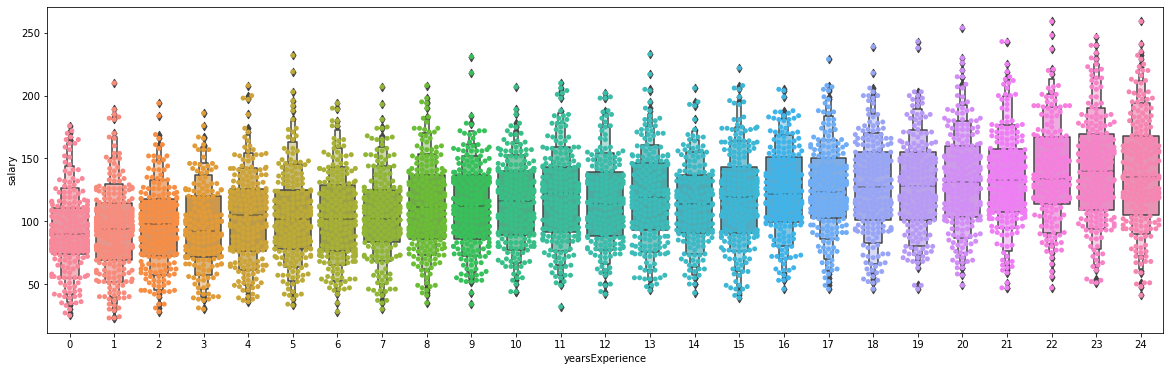

In [74]:
# combine boxen and swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize = (20,6))
sns.swarmplot(x="yearsExperience", y="salary", data=train_data.iloc[1:5000])
sns.boxenplot(x="yearsExperience", y="salary", data=train_data.iloc[1:5000])
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

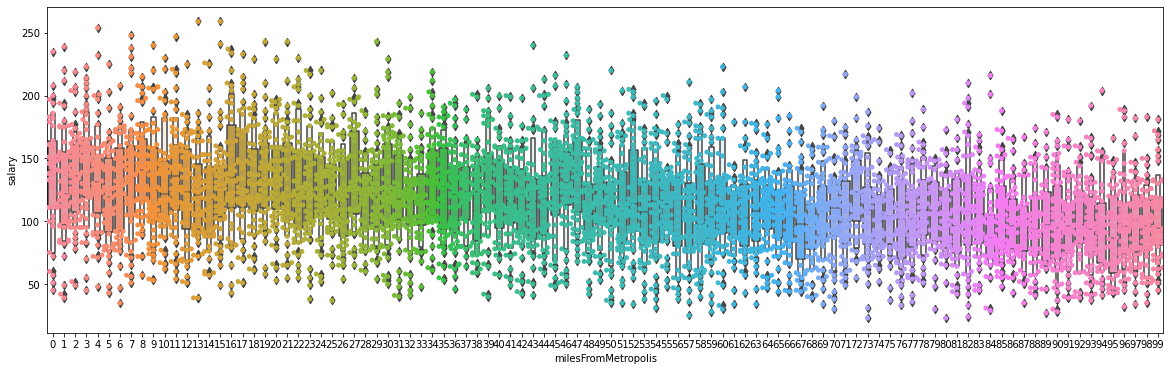

In [75]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize = (20,6))
sns.swarmplot(x="milesFromMetropolis", y="salary", data=train_data.iloc[1:5000])
sns.boxenplot(x="milesFromMetropolis", y="salary", data=train_data.iloc[1:5000])
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

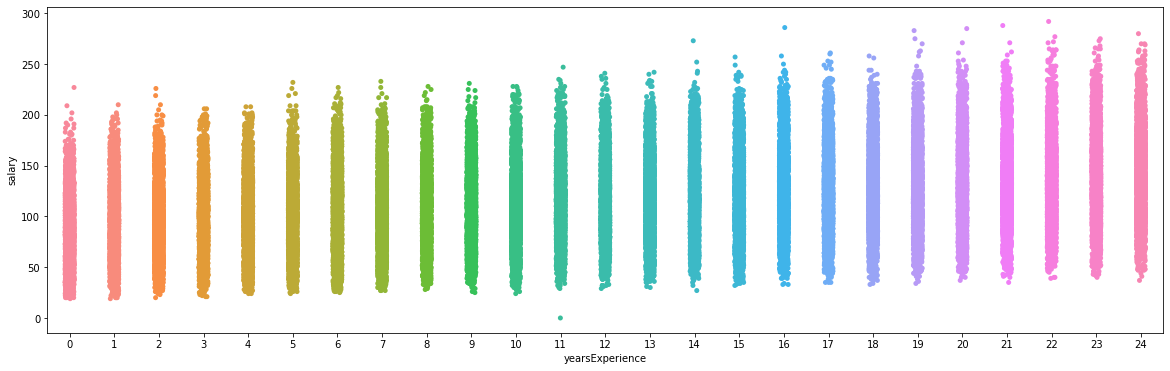

In [76]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x="yearsExperience", y="salary", data=train_data)
plt.show()

from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

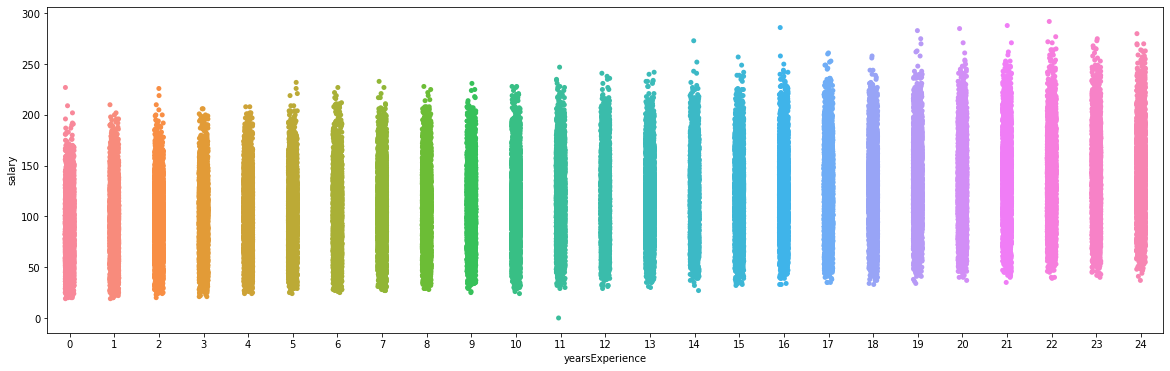

In [77]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize = (20,6))
sns.stripplot(x="yearsExperience", y="salary", data=train_data)
plt.show()

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

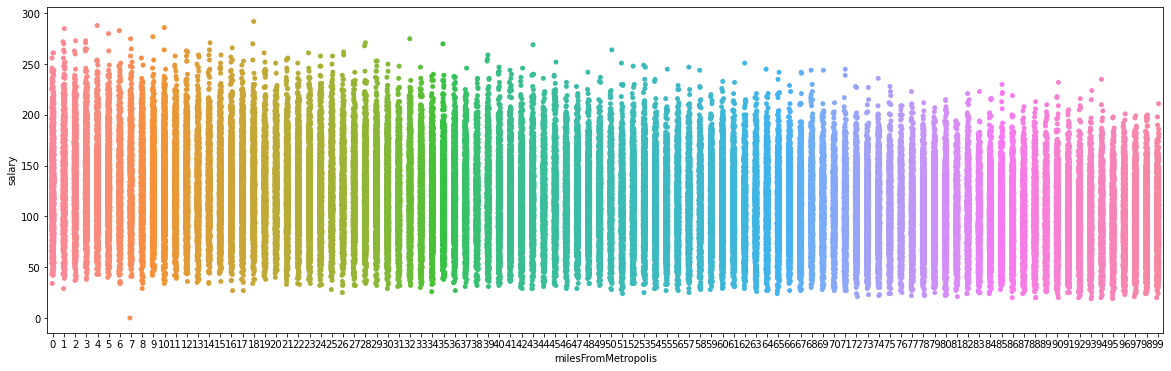

In [78]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize = (20,6))
sns.stripplot(x="milesFromMetropolis", y="salary", data=train_data)
plt.show()

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [89]:
"""
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  
  groups = train_anova.groupby(x).count().reset_index()
  
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  
  for major in unique_majors:
        stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
        plt.title("Probability Plot - ", str(major))
        plt.show()
    
      


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = [])
  

  # calculate SSTR and update anova table
  x_bar = 
  SSTR = 
  anova_table['SS']['Between Groups'] = 

  # calculate SSE and update anova table
  SSE = 
  anova_table['SS']['Within Groups'] = 

  # calculate SSTR and update anova table
  SSTR = 
  anova_table['SS']['Total'] = 

  # update degree of freedom
  anova_table['df']['Between Groups'] = 
  anova_table['df']['Within Groups'] = 
  anova_table['df']['Total'] = 

  # calculate MS
  anova_table['MS'] = 

  # calculate F 
  F = 
  anova_table['F']['Between Groups'] = 

  # p-value
  anova_table['P-value']['Between Groups'] = 

  # F critical 
  alpha = 
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)
"""

'\n# perform anova test between two variables.\n\ndef perform_anova_test(x,y):\n  # two variables of interest\n  train_anova = train_data[[x,y]]\n  \n  groups = train_anova.groupby(x).count().reset_index()\n  \n  # groups.plot(kind=\'bar\',x=\'major\',y=\'salary\')\n  print(groups)\n\n\n  unique_majors = train_anova[x].unique()\n  \n  for major in unique_majors:\n        stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)\n        plt.title("Probability Plot - ", str(major))\n        plt.show()\n    \n      \n\n\n  # calculate ratio of the largest to the smallest sample standard deviation\n  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()\n  print(ratio)\n\n\n  # Create ANOVA backbone table\n  data = [[\'Between Groups\', \'\', \'\', \'\', \'\', \'\', \'\'], [\'Within Groups\', \'\', \'\', \'\', \'\', \'\', \'\'], [\'Total\', \'\', \'\', \'\', \'\', \'\', \'\']] \n  anova_table = pd.DataFrame(data, columns = [])\n  \n\n  # calc

In [ ]:
# perform anova test on major and salary


In [ ]:
# perform anova test on jobType and salary


In [ ]:
# perform anova test on degree and salary


In [ ]:
# perform anova test on industry and salary


In [ ]:
# perform anova test on jobType and yearsExperience


In [ ]:
# perform anova test on degree and yearsExperience


In [ ]:
# perform anova test on major and yearsExperience


In [ ]:
# perform anova test on industry and yearsExperience


## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [91]:
X = train_data.drop(columns=["salary"])
y = train_data["salary"]

In [92]:
MMS = MinMaxScaler()

In [93]:
X[["yearsExperience", "milesFromMetropolis"]] = MMS.fit_transform(X[["yearsExperience", "milesFromMetropolis"]])

In [94]:
X.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH         0.416667   
1             CEO  HIGH_SCHOOL       NONE      WEB         0.125000   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH         0.416667   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO         0.333333   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE         0.333333   

   milesFromMetropolis  
0             0.838384  
1             0.737374  
2             0.383838  
3             0.171717  
4             0.161616

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [96]:
X_train.head(2)

jobType    degree     major industry  yearsExperience  \
78689  SENIOR  DOCTORAL  BUSINESS  FINANCE             0.75   
76423     CFO  DOCTORAL   PHYSICS      OIL             0.25   

       milesFromMetropolis  
78689             0.272727  
76423             0.636364

In [97]:
X_test.head(2)

jobType     degree        major industry  yearsExperience  \
43660  MANAGER    MASTERS      COMPSCI      WEB         1.000000   
87278   SENIOR  BACHELORS  ENGINEERING  SERVICE         0.041667   

       milesFromMetropolis  
43660             0.585859  
87278             0.959596

In [98]:
y_train.head(2)

78689    199
76423    178
Name: salary, dtype: int64

In [99]:
y_test.head(2)

43660    125
87278     78
Name: salary, dtype: int64

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [101]:
#One hot encoding on categorical data
trf1 = ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False),[0,1,2,3])
],remainder="passthrough")

### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [103]:
pipe = Pipeline([
    ('trf1',trf1),
    ('LR',LR)
])

In [104]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3])])),
                ('LR', LinearRegression())])

In [114]:
y_pred_LR = pipe.predict(X_test)

In [115]:
y_pred_LR.shape

(20000,)

In [107]:
LR_MSE = mean_absolute_error(y_pred, y_test)

### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [108]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=200, criterion='mse', random_state=1)

pipe = Pipeline([
    ('trf1',trf1),
    ('RF',RF)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

RF_MSE = mean_absolute_error(y_pred, y_test)

### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

pipe = Pipeline([
    ('trf1',trf1),
    ('GBR',GBR)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

GBR_MSE = mean_absolute_error(y_pred, y_test)

### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [111]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

pipe = Pipeline([
    ('trf1',trf1),
    ('GBR',GBR)
])

pipe.fit(X_train, y_train)

y_pred_final = pipe.predict(X_test)

DTR_MSE = mean_absolute_error(y_pred_final, y_test)

### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()

pipe = Pipeline([
    ('trf1',trf1),
    ('ADB',ADB)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

ADB_MSE = mean_absolute_error(y_pred, y_test)

#### RMSE of all model on train and test data

In [113]:
# printing rmse comparision of model on train and test
print("Linear Regresion Model MSE is {}".format(LR_MSE))
print("Random Forest Regresion Model MSE is {}".format(RF_MSE))
print("GBR Regresion Model MSE is {}".format(GBR_MSE))
print("DTR Regresion Model MSE is {}".format(DTR_MSE ))
print("ADA Boost Regresion Model MSE is {}".format(ADB_MSE))

Linear Regresion Model MSE is 15.826446875
Random Forest Regresion Model MSE is 16.3116055511544
GBR Regresion Model MSE is 15.662763141603683
DTR Regresion Model MSE is 15.662763141603689
ADA Boost Regresion Model MSE is 20.996471831740347


## Minimum RMSE score is 15.82 [LinearRegression]

# Save Test Prediction

In [116]:
output = pd.DataFrame({'Id' : X_test.index, 'Salary' : y_pred_LR})
output.to_csv('submission.csv', index=False)

# Predict Manually
## Exporting the model

In [117]:
import joblib

# Save the model as a pickle in a file
joblib.dump(pipe, 'salary.sav')

# Load the model from the file
knn_from_joblib = joblib.load('salary.sav')

In [119]:
X_train.head()

jobType    degree     major industry  yearsExperience  \
78689  SENIOR  DOCTORAL  BUSINESS  FINANCE         0.750000   
76423     CFO  DOCTORAL   PHYSICS      OIL         0.250000   
86945     CTO  DOCTORAL   BIOLOGY  SERVICE         0.708333   
57427     CFO   MASTERS      MATH   HEALTH         0.375000   
34616     CEO  DOCTORAL  BUSINESS   HEALTH         0.625000   

       milesFromMetropolis  
78689             0.272727  
76423             0.636364  
86945             0.545455  
57427             0.949495  
34616             0.666667

In [118]:
pipe.predict(pd.DataFrame(columns = ["jobType", "degree", "major", "industry", "yearsExperience", "milesFromMetropolis"],
                         data = np.array(["MANAGER","NONE","NONE", "SERVICE", 0.125000, 0.868687]).reshape(1,6)))

array([96.70841175])

In [120]:
train_data.iloc[5140]

jobType                MANAGER
degree                    NONE
major                     NONE
industry               SERVICE
yearsExperience              3
milesFromMetropolis         86
salary                      78
Name: 5140, dtype: object